In [2]:
import pandas as pd
import numpy as np

from wordcloud import WordCloud

from typing import Callable

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords

import textstat
from razdel import tokenize

from tqdm.notebook import tqdm
tqdm.pandas()

from pandarallel import pandarallel
pandarallel.initialize(nb_workers=12, progress_bar=True)

from sklearn.model_selection import train_test_split

INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [3]:
train = pd.read_csv('../../data/train_unique_reviews.csv')
test = pd.read_csv('../../data/test_unique_reviews.csv')

reviews = pd.concat([train, test], axis=0)
reviews

,review,is_AI
0,"Жаль, крем не оправдал ожиданий. Заявленный эф...",1
1,"Платье красивое, но мне пришло с браком, очень...",0
2,Посылка пришла в непотребном виде.Получила на ...,0
3,"Маленький принц’, 12+, оказался совсем не мале...",1
4,"Адовая синтетика, но что за такую цену можно в...",0
...,...,...
4685,"Платье полностью не соответствует размеруXXL,к...",0
4686,"Качество хорошее, свитер пушистый. Но размер н...",0
4687,"Три месяца ждала заказ , так и не дождалась.\r...",0
4688,Заказ не пришёл. Деньги вернули,0


In [4]:
reviews

,review,is_AI
0,"Жаль, крем не оправдал ожиданий. Заявленный эф...",1
1,"Платье красивое, но мне пришло с браком, очень...",0
2,Посылка пришла в непотребном виде.Получила на ...,0
3,"Маленький принц’, 12+, оказался совсем не мале...",1
4,"Адовая синтетика, но что за такую цену можно в...",0
...,...,...
4685,"Платье полностью не соответствует размеруXXL,к...",0
4686,"Качество хорошее, свитер пушистый. Но размер н...",0
4687,"Три месяца ждала заказ , так и не дождалась.\r...",0
4688,Заказ не пришёл. Деньги вернули,0


### WordCloud

CPU times: total: 4.75 s
Wall time: 10.9 s


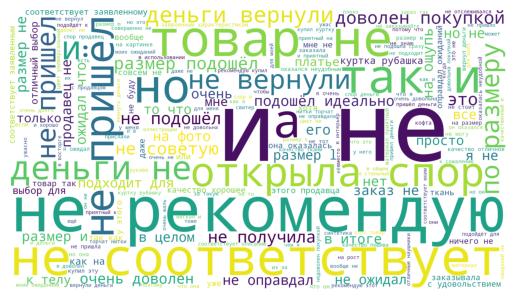

In [68]:
%%time

merged_text = reviews['review'].str.cat(sep=' ').lower()

wc = WordCloud(width=1920, height=1080, background_color="white").generate(merged_text)
plt.imshow(wc)
plt.axis("off");

CPU times: total: 4.52 s
Wall time: 10.3 s


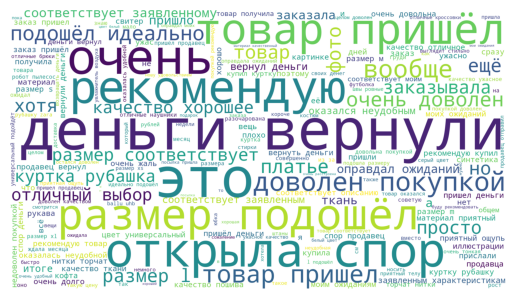

In [69]:
%%time

merged_text = reviews['review'].str.cat(sep=' ').lower()
stop_words = set(stopwords.words('russian'))
filtered_words = [word for word in merged_text.split() if word not in stop_words]
filtered_text = ' '.join(filtered_words)

wc = WordCloud(width=1920, height=1080, background_color="white").generate(filtered_text)
plt.imshow(wc)
plt.axis("off");

In [ ]:
%%time

merged_text = reviews['review'].str.cat(sep=' ').lower()
stop_words = set(stopwords.words('russian'))
stop_words.remove('не')
filtered_words = [word for word in merged_text.split() if word not in stop_words]
filtered_text = ' '.join(filtered_words)

wc = WordCloud(width=1920, height=1080, background_color="white").generate(filtered_text)
plt.imshow(wc)
plt.axis("off");

In [ ]:
from pymorphy3 import MorphAnalyzer

morph = MorphAnalyzer()
morph.parse('машина')[0].normal_form

### Text Cleaning

In [8]:
reviews = pd.read_csv('./reviews_preprocessed_with_textstat.csv')
reviews

,review,is_AI,processed_text,automated_readability_index,avg_letter_per_word,avg_sentence_length,avg_sentence_per_word,char_count,coleman_liau_index,crawford,...,linsear_write_formula,lix,long_word_count,mcalpine_eflaw,miniword_count,monosyllabcount,reading_time,sentence_count,syllable_count,words_per_sentence
0,"Жаль, крем не оправдал ожиданий. Заявленный эф...",1,"жаль , крем не оправдать ожидание . заявить эф...",11.5,6.20,3.8,0.27,99,12.17,-4.1,...,0.875000,50.47,7,4.5,3,15,1.45,4,15,3.750000
1,"Платье красивое, но мне пришло с браком, очень...",0,"платье красивый , прийти брак , очень неприятно",8.2,5.11,9.0,0.11,48,10.58,-0.9,...,3.500000,42.33,2,12.0,3,9,0.71,1,9,9.000000
2,Посылка пришла в непотребном виде.Получила на ...,0,посылка прийти непотребный вид . получить почт...,13.1,6.30,6.7,0.15,265,16.30,-1.7,...,2.333333,54.20,19,8.3,10,40,3.89,6,40,6.666667
3,"Маленький принц’, 12+, оказался совсем не мале...",1,"маленький принц ’ , 12 + , оказаться не малень...",7.5,5.17,5.8,0.17,160,9.15,-2.1,...,1.900000,47.18,10,8.0,11,29,2.35,5,29,5.800000
4,"Адовая синтетика, но что за такую цену можно в...",0,"адовый синтетик , цена впринцип ожидать",7.2,4.82,11.0,0.09,54,9.49,-0.5,...,4.500000,38.27,3,15.0,4,11,0.79,1,11,11.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23441,"Платье полностью не соответствует размеруXXL,к...",0,платье полностью не соответствовать размер xxl...,9.4,5.42,8.7,0.12,146,12.08,-1.0,...,3.333333,31.78,6,12.0,10,26,2.14,3,26,8.666667
23442,"Качество хорошее, свитер пушистый. Но размер н...",0,"качество хороший , свитер пушистый . размер не...",9.6,5.66,5.8,0.17,173,12.00,-2.1,...,2.000000,42.47,11,8.0,11,29,2.54,5,29,5.800000
23443,"Три месяца ждала заказ , так и не дождалась.\r...",0,"месяц ждать заказ , не дождаться . не рекоменд...",6.6,4.60,10.0,0.10,49,7.92,-0.7,...,4.500000,28.18,2,15.0,5,10,0.72,1,10,10.000000
23444,Заказ не пришёл. Деньги вернули,0,заказ не прийти . деньга вернуть,6.5,5.20,5.0,0.20,27,8.44,-2.7,...,1.500000,45.00,1,6.0,1,5,0.40,1,5,5.000000


In [4]:
def clean_text(text):
    from razdel import tokenize
    from pymorphy3 import MorphAnalyzer
    from nltk.corpus import stopwords

    text = text.lower()

    sw_to_drop = ['не']
    
    morph = MorphAnalyzer()
    sws = set(stopwords.words('russian'))

    for sw in sw_to_drop:
        sws.remove(sw)
    
    tokens = tokenize(text)
    tokens = [morph.parse(token.text)[0].normal_form for token in tokens]
    tokens = [token for token in tokens if token not in sws]

    return ' '.join(tokens) 

In [5]:
reviews['processed_text'] = reviews['review'].parallel_apply(clean_text)

In [6]:
reviews

,review,is_AI,processed_text
0,"Жаль, крем не оправдал ожиданий. Заявленный эф...",1,"жаль , крем не оправдать ожидание . заявить эф..."
1,"Платье красивое, но мне пришло с браком, очень...",0,"платье красивый , прийти брак , очень неприятно"
2,Посылка пришла в непотребном виде.Получила на ...,0,посылка прийти непотребный вид . получить почт...
3,"Маленький принц’, 12+, оказался совсем не мале...",1,"маленький принц ’ , 12 + , оказаться не малень..."
4,"Адовая синтетика, но что за такую цену можно в...",0,"адовый синтетик , цена впринцип ожидать"
...,...,...,...
4685,"Платье полностью не соответствует размеруXXL,к...",0,платье полностью не соответствовать размер xxl...
4686,"Качество хорошее, свитер пушистый. Но размер н...",0,"качество хороший , свитер пушистый . размер не..."
4687,"Три месяца ждала заказ , так и не дождалась.\r...",0,"месяц ждать заказ , не дождаться . не рекоменд..."
4688,Заказ не пришёл. Деньги вернули,0,заказ не прийти . деньга вернуть


### Zipf Distribution

In [156]:
def plot_zipf_diagram(texts: pd.Series) -> None:
    from collections import Counter
    import matplotlib.pyplot as plt

    plt.figure(figsize=(20, 10))
    
    text = texts.str.cat(sep=' ')
    tokens = text.split()
    counts = Counter(tokens).most_common()
    labels = [label for label, count in counts]
    counts = [count for label, count in counts]
    plt.bar(counts, range(len(set(tokens))))
    plt.xlim(0, 250)


def compare_zipf_diagrams(texts_real: pd.Series, texts_generated: pd.Series):
    from collections import Counter
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 6))

    text = texts_generated.str.cat(sep=' ')
    tokens = text.split()
    counts = Counter(tokens).most_common()
    labels1, values1 = [], []
    for label, value in counts:
        labels1.append(label)
        values1.append(value)
    q1 = pd.Series(values1).quantile(0.999999)
    
    text = texts_real.str.cat(sep=' ')
    tokens = text.split()
    counts = Counter(tokens).most_common()
    labels2, values2 = [], []
    for label, value in counts:
        labels2.append(label)
        values2.append(value)
    q2 = pd.Series(values2).quantile(0.999999)
    
    values1 = pd.Series(values1).clip(upper=max(q1, q2))
    values2 = pd.Series(values2).clip(upper=max(q1, q2))

    plt.bar(range(len(set(labels1))), values1, label='generated', alpha=0.5, color='red')
    plt.bar(range(len(set(labels2))), values2, label='real', alpha=0.5, color='blue')
    
    plt.xlim(0, 50)
    plt.title('Zipf Distribution')
    plt.xlabel('Some word index')
    plt.ylabel('Number of occurrencies')

    plt.grid()
    plt.legend()
    plt.tight_layout()

In [157]:
reviews.is_AI.value_counts()

is_AI
1    11723
0    11723
Name: count, dtype: int64

**Для оригинальных отзывов**

In [158]:
%%time

compare_zipf_diagrams(reviews.query('is_AI == 0')['review'], reviews.query('is_AI == 1')['review'])
plt.savefig(f'../../visualization/zip_diagrams_original.png', dpi=400)
plt.clf()

CPU times: total: 1min 9s
Wall time: 1min 10s


<Figure size 1200x600 with 0 Axes>

**Для предобработанных отзывов**

In [159]:
%%time

compare_zipf_diagrams(reviews.query('is_AI == 0')['processed_text'], reviews.query('is_AI == 1')['processed_text'])
plt.savefig(f'../../visualization/zip_diagrams_preprocessed.png', dpi=400)
plt.clf()

CPU times: total: 21.7 s
Wall time: 21.9 s


<Figure size 1200x600 with 0 Axes>

### Just words distribution

In [98]:
def get_words_number_of_occurrencies(texts: pd.Series) -> pd.DataFrame:
    from collections import Counter

    text = texts.str.cat(sep=' ')
    tokens = text.split()
    counts = Counter(tokens).most_common()
    df = pd.DataFrame(counts)
    return df



In [99]:
real = get_words_number_of_occurrencies(reviews.query('is_AI == 0')['processed_text'])
real.index = real[0]
real.drop(columns=[0], inplace=True)
generated = get_words_number_of_occurrencies(reviews.query('is_AI == 1')['processed_text'])
generated.index = generated[0]
generated.drop(columns=[0], inplace=True)

In [100]:
real

,1
0,
",",25302
.,22761
не,17073
продавец,5016
деньга,4502
...,...
трухан,1
малютка,1
зарекаться,1


In [101]:
generated

,1
0,
.,36950
",",19299
не,9956
размер,4926
купить,3681
...,...
существенно,1
держатель,1
вечеринка,1


In [102]:
real, generated = real.align(generated, axis=0, fill_value=0.0)
stats = pd.concat([real, generated], axis=1)
stats.columns = ['real', 'generated']
stats

,real,generated
0,,
!,4113.0,1369.0
!!,258.0,0.0
!!!,1121.0,0.0
!!!!,418.0,0.0
!!!!!,140.0,0.0
...,...,...
➕,1.0,0.0
⭐️⭐️,1.0,0.0
！,1.0,0.0


In [155]:
cur = (stats['real'] - stats['generated']).abs()
plt.bar(range(len(stats)), cur.clip(upper=cur.quantile(0.999)), label='real', color='blue')
plt.title('The absolute value of differencies for word occurrencies \n in Real and Generated reviews')
plt.xlabel('Some word ID in both Real and Generated datasets')
plt.ylabel('The difference in number of occurrencies')
plt.ylim(0, 200);

plt.savefig(f'../../visualization/Difference_in_word_occurrencies.png', dpi=400)
plt.clf()

<Figure size 640x480 with 0 Axes>

### TextStat

In [17]:
meth_ignore_list = ['set_lang',  # Not appropriate
                    'wiener_sachtextformel',
                     'avg_character_per_word',  'avg_syllables_per_word',  
                     'count_arabic_long_words',  'count_arabic_syllables',  
                    'count_complex_arabic_words', 'count_faseeh', 
                    'dale_chall_readability_score', 'dale_chall_readability_score_v2', 
                   'is_difficult_word', 'is_easy_word', 
                   'letter_count', 'osman', 
                   'polysyllabcount', 'rix', 'smog_index', 
                    'spache_readability', 'szigriszt_pazos'
                   ]
good_methods: dict[str, Callable] = {}

for meth_name in dir(textstat):
    # print(meth_name)
    if not meth_name.startswith('__') and meth_name not in meth_ignore_list:
        meth = getattr(textstat, meth_name)
        if isinstance(meth, Callable):
            try:
                res = meth(reviews['processed_text'].iloc[0])
                if isinstance(res, (int, float, bool)):
                    print(meth_name, res)   
                    good_methods[meth_name] = meth
            except Exception as e:
                print(e)
                raise e

def apply_textstat(text, meth): 
    try:
        res = meth(text)
    except OSError:
        return None
    except ZeroDivisionError:
        return None
    return res


# X_train = X.copy()
# y_train = y.copy()
# X_test = test.copy()

for meth_name, meth in tqdm(good_methods.items()):
    reviews[meth_name] = reviews['review'].progress_apply(apply_textstat, args=(meth,))
# for meth_name, meth in tqdm(good_methods.items()):
#     reviews[meth_name] = reviews['review'].progress_apply(apply_textstat, args=(meth,))

automated_readability_index 12.5
avg_letter_per_word 6.4
avg_sentence_length 3.8
avg_sentence_per_word 0.27
char_count 102
coleman_liau_index 13.33
crawford -4.1
difficult_words 0
fernandez_huerta 142.96
flesch_kincaid_grade -2.4
flesch_reading_ease 118.38
gulpease_index 101.0
gunning_fog 1.52
gutierrez_polini 31.81
lexicon_count 15
linsear_write_formula 1.625
lix 37.13
long_word_count 7
mcalpine_eflaw 4.5
miniword_count 3
monosyllabcount 15
reading_time 1.5
sentence_count 4
syllable_count 15
words_per_sentence 3.75


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/23446 [00:00<?, ?it/s]

  0%|          | 0/23446 [00:00<?, ?it/s]

  0%|          | 0/23446 [00:00<?, ?it/s]

  0%|          | 0/23446 [00:00<?, ?it/s]

  0%|          | 0/23446 [00:00<?, ?it/s]

  0%|          | 0/23446 [00:00<?, ?it/s]

  0%|          | 0/23446 [00:00<?, ?it/s]

  0%|          | 0/23446 [00:00<?, ?it/s]

  0%|          | 0/23446 [00:00<?, ?it/s]

  0%|          | 0/23446 [00:00<?, ?it/s]

  0%|          | 0/23446 [00:00<?, ?it/s]

  0%|          | 0/23446 [00:00<?, ?it/s]

  0%|          | 0/23446 [00:00<?, ?it/s]

  0%|          | 0/23446 [00:00<?, ?it/s]

  0%|          | 0/23446 [00:00<?, ?it/s]

  0%|          | 0/23446 [00:00<?, ?it/s]

  0%|          | 0/23446 [00:00<?, ?it/s]

  0%|          | 0/23446 [00:00<?, ?it/s]

  0%|          | 0/23446 [00:00<?, ?it/s]

  0%|          | 0/23446 [00:00<?, ?it/s]

  0%|          | 0/23446 [00:00<?, ?it/s]

  0%|          | 0/23446 [00:00<?, ?it/s]

  0%|          | 0/23446 [00:00<?, ?it/s]

  0%|          | 0/23446 [00:00<?, ?it/s]

  0%|          | 0/23446 [00:00<?, ?it/s]

In [18]:
reviews.head(3)

,review,is_AI,processed_text,automated_readability_index,avg_letter_per_word,avg_sentence_length,avg_sentence_per_word,char_count,coleman_liau_index,crawford,...,linsear_write_formula,lix,long_word_count,mcalpine_eflaw,miniword_count,monosyllabcount,reading_time,sentence_count,syllable_count,words_per_sentence
0,"Жаль, крем не оправдал ожиданий. Заявленный эф...",1,"жаль , крем не оправдать ожидание . заявить эф...",11.5,6.20,3.8,0.27,99,12.17,-4.1,...,0.875000,50.47,7,4.5,3,15,1.45,4,15,3.750000
1,"Платье красивое, но мне пришло с браком, очень...",0,"платье красивый , прийти брак , очень неприятно",8.2,5.11,9.0,0.11,48,10.58,-0.9,...,3.500000,42.33,2,12.0,3,9,0.71,1,9,9.000000
2,Посылка пришла в непотребном виде.Получила на ...,0,посылка прийти непотребный вид . получить почт...,13.1,6.30,6.7,0.15,265,16.30,-1.7,...,2.333333,54.20,19,8.3,10,40,3.89,6,40,6.666667


In [19]:
reviews.isna().any()

review                         False
is_AI                          False
processed_text                 False
automated_readability_index    False
avg_letter_per_word            False
avg_sentence_length            False
avg_sentence_per_word          False
char_count                     False
coleman_liau_index             False
crawford                       False
difficult_words                False
fernandez_huerta               False
flesch_kincaid_grade           False
flesch_reading_ease            False
gulpease_index                 False
gunning_fog                    False
gutierrez_polini               False
lexicon_count                  False
linsear_write_formula          False
lix                            False
long_word_count                False
mcalpine_eflaw                 False
miniword_count                 False
monosyllabcount                False
reading_time                   False
sentence_count                 False
syllable_count                 False
w

In [20]:
reviews.to_csv('./reviews_preprocessed_with_textstat.csv', index=False)

In [150]:
reviews

,review,is_AI,processed_text,automated_readability_index,avg_letter_per_word,avg_sentence_length,avg_sentence_per_word,char_count,coleman_liau_index,crawford,...,linsear_write_formula,lix,long_word_count,mcalpine_eflaw,miniword_count,monosyllabcount,reading_time,sentence_count,syllable_count,words_per_sentence
0,"Жаль, крем не оправдал ожиданий. Заявленный эф...",1,"жаль , крем не оправдать ожидание . заявить эф...",11.5,6.20,3.8,0.27,99,12.17,-4.1,...,0.875000,50.47,7,4.5,3,15,1.45,4,15,3.750000
1,"Платье красивое, но мне пришло с браком, очень...",0,"платье красивый , прийти брак , очень неприятно",8.2,5.11,9.0,0.11,48,10.58,-0.9,...,3.500000,42.33,2,12.0,3,9,0.71,1,9,9.000000
2,Посылка пришла в непотребном виде.Получила на ...,0,посылка прийти непотребный вид . получить почт...,13.1,6.30,6.7,0.15,265,16.30,-1.7,...,2.333333,54.20,19,8.3,10,40,3.89,6,40,6.666667
3,"Маленький принц’, 12+, оказался совсем не мале...",1,"маленький принц ’ , 12 + , оказаться не малень...",7.5,5.17,5.8,0.17,160,9.15,-2.1,...,1.900000,47.18,10,8.0,11,29,2.35,5,29,5.800000
4,"Адовая синтетика, но что за такую цену можно в...",0,"адовый синтетик , цена впринцип ожидать",7.2,4.82,11.0,0.09,54,9.49,-0.5,...,4.500000,38.27,3,15.0,4,11,0.79,1,11,11.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23441,"Платье полностью не соответствует размеруXXL,к...",0,платье полностью не соответствовать размер xxl...,9.4,5.42,8.7,0.12,146,12.08,-1.0,...,3.333333,31.78,6,12.0,10,26,2.14,3,26,8.666667
23442,"Качество хорошее, свитер пушистый. Но размер н...",0,"качество хороший , свитер пушистый . размер не...",9.6,5.66,5.8,0.17,173,12.00,-2.1,...,2.000000,42.47,11,8.0,11,29,2.54,5,29,5.800000
23443,"Три месяца ждала заказ , так и не дождалась.\r...",0,"месяц ждать заказ , не дождаться . не рекоменд...",6.6,4.60,10.0,0.10,49,7.92,-0.7,...,4.500000,28.18,2,15.0,5,10,0.72,1,10,10.000000
23444,Заказ не пришёл. Деньги вернули,0,заказ не прийти . деньга вернуть,6.5,5.20,5.0,0.20,27,8.44,-2.7,...,1.500000,45.00,1,6.0,1,5,0.40,1,5,5.000000


In [154]:
for col in tqdm(reviews.columns[3:]):
    plt.figure(figsize=(10, 6))
    q = [0, 0]
    dfs = [0, 0]
    for is_AI in (0, 1):
        cur_df = reviews.query('is_AI == @is_AI')
        q[is_AI] = cur_df[col].quantile(0.99)
        dfs[is_AI] = cur_df
    
    plt.bar(range(len(dfs[0])), dfs[0][col].clip(upper=max(q)), alpha=0.5, label='real', color='blue')
    plt.bar(range(len(dfs[1])), dfs[1][col].clip(upper=max(q)), alpha=0.5, label='generated', color='red')

    plt.title(col)
    plt.xlabel('Each review')
    plt.ylabel('Values')
    plt.grid()
    plt.legend()
    plt.savefig(f'../../visualization/images_textstat_features_ordered/{col}.png', dpi=400)
    plt.clf()

  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Yaroslav Pristalov\AppData\Local\Temp\ipykernel_5232\3217971940.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(f'../../visualization/images_textstat_features_ordered/{col}.png', dpi=400)
C:\Users\Yaroslav Pristalov\AppData\Local\Temp\ipykernel_5232\3217971940.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(f'../../visualization/images_textstat_features_ordered/{col}.png', dpi=400)
C:\Users\Yaroslav Pristalov\AppData\Local\Temp\ipykernel_5232\3217971940.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(f'../../visualization/images_textstat_features_ordered/{col}.png', dpi=400)
C:\Users\Yaroslav Pristalov\AppData\Local\Temp\ipykernel_5232\3217971940.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(f'../../visualization/images_textstat_features_ordered/{

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [153]:
for col in tqdm(reviews.columns[3:]):
    plt.figure(figsize=(10, 6))
    q = [0, 0]
    dfs = [0, 0]
    for is_AI in (0, 1):
        cur_df = reviews.query('is_AI == @is_AI')
        cur_df.sort_values(col, ascending=False, inplace=True)
        q[is_AI] = cur_df[col].quantile(0.99)
        dfs[is_AI] = cur_df
    
    plt.bar(range(len(dfs[0])), dfs[0][col].clip(upper=max(q)), alpha=0.5, label='real', color='blue')
    plt.bar(range(len(dfs[1])), dfs[1][col].clip(upper=max(q)), alpha=0.5, label='generated', color='red')
    
    plt.title(col)
    plt.xlabel('Some reviews')
    plt.ylabel('Values')
    plt.grid()
    plt.legend()    
    plt.savefig(f'../../visualization/images_textstat_features_sorted_hist/{col}.png', dpi=400)
    plt.clf()

  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Yaroslav Pristalov\AppData\Local\Temp\ipykernel_5232\474806607.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cur_df.sort_values(col, ascending=False, inplace=True)
C:\Users\Yaroslav Pristalov\AppData\Local\Temp\ipykernel_5232\474806607.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cur_df.sort_values(col, ascending=False, inplace=True)
C:\Users\Yaroslav Pristalov\AppData\Local\Temp\ipykernel_5232\474806607.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [34]:
# !pip install ydata_profiling

In [23]:
from ydata_profiling import ProfileReport

profile = ProfileReport(reviews.iloc[:, :3], title="Profiling Report")

In [24]:
with open('ydata_profiling.html', 'wt', encoding='UTF-8') as f:
    f.write(profile.to_html())

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

D:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\ydata_profiling\model\typeset.py:125: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  not pdt.is_categorical_dtype(series)
D:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\ydata_profiling\model\typeset.py:208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_valid_dtype = pdt.is_categorical_dtype(series) and not pdt.is_bool_dtype(
D:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\ydata_profiling\model\typeset.py:125: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  not pdt.is_categorical_dtype(series)
D:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\ydata_profiling\model\typeset_relations.py:34: FutureWarning: is_categorical_dtype is deprec

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
reviews

,review,is_AI,processed_text,automated_readability_index,avg_letter_per_word,avg_sentence_length,avg_sentence_per_word,char_count,coleman_liau_index,crawford,...,linsear_write_formula,lix,long_word_count,mcalpine_eflaw,miniword_count,monosyllabcount,reading_time,sentence_count,syllable_count,words_per_sentence
0,"Жаль, крем не оправдал ожиданий. Заявленный эф...",1,"жаль , крем не оправдать ожидание . заявить эф...",11.5,6.20,3.8,0.27,99,12.17,-4.1,...,0.875000,50.47,7,4.5,3,15,1.45,4,15,3.750000
1,"Платье красивое, но мне пришло с браком, очень...",0,"платье красивый , прийти брак , очень неприятно",8.2,5.11,9.0,0.11,48,10.58,-0.9,...,3.500000,42.33,2,12.0,3,9,0.71,1,9,9.000000
2,Посылка пришла в непотребном виде.Получила на ...,0,посылка прийти непотребный вид . получить почт...,13.1,6.30,6.7,0.15,265,16.30,-1.7,...,2.333333,54.20,19,8.3,10,40,3.89,6,40,6.666667
3,"Маленький принц’, 12+, оказался совсем не мале...",1,"маленький принц ’ , 12 + , оказаться не малень...",7.5,5.17,5.8,0.17,160,9.15,-2.1,...,1.900000,47.18,10,8.0,11,29,2.35,5,29,5.800000
4,"Адовая синтетика, но что за такую цену можно в...",0,"адовый синтетик , цена впринцип ожидать",7.2,4.82,11.0,0.09,54,9.49,-0.5,...,4.500000,38.27,3,15.0,4,11,0.79,1,11,11.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4685,"Платье полностью не соответствует размеруXXL,к...",0,платье полностью не соответствовать размер xxl...,9.4,5.42,8.7,0.12,146,12.08,-1.0,...,3.333333,31.78,6,12.0,10,26,2.14,3,26,8.666667
4686,"Качество хорошее, свитер пушистый. Но размер н...",0,"качество хороший , свитер пушистый . размер не...",9.6,5.66,5.8,0.17,173,12.00,-2.1,...,2.000000,42.47,11,8.0,11,29,2.54,5,29,5.800000
4687,"Три месяца ждала заказ , так и не дождалась.\r...",0,"месяц ждать заказ , не дождаться . не рекоменд...",6.6,4.60,10.0,0.10,49,7.92,-0.7,...,4.500000,28.18,2,15.0,5,10,0.72,1,10,10.000000
4688,Заказ не пришёл. Деньги вернули,0,заказ не прийти . деньга вернуть,6.5,5.20,5.0,0.20,27,8.44,-2.7,...,1.500000,45.00,1,6.0,1,5,0.40,1,5,5.000000


---

In [48]:
print(reviews.shape)
print(reviews.drop_duplicates('review').shape)

(29288, 28)
(26367, 28)


In [53]:
reviews.drop_duplicates('review')[['review', 'is_AI']].to_csv('unique_reviews.csv', index=False)

In [55]:
new_reviews = pd.read_csv('./unique_reviews.csv')
new_reviews

,review,is_AI
0,"Продавец выслал не тот цвет, я очень расстроил...",0
1,Отличные часы! Купил их для подруги. Качество ...,1
2,редкостная дрянь....,0
3,"Купил отцу этот фильтр, он доволен. Но я счита...",1
4,Купил подгузники Huggies Elite Soft для моей с...,1
...,...,...
26362,Отличная зубная паста. Хорошо пенится. Вкус и ...,1
26363,Купил витамины для волос после рекомендации тр...,1
26364,Коллега будет доволен. Вещь хорошая\n,1
26365,ужасные шорты. в реальности сильно отличаются ...,0


In [67]:
new_reviews.is_AI.value_counts()

is_AI
0    14644
1    11723
Name: count, dtype: int64

In [72]:
new_reviews = pd.concat([new_reviews.query('is_AI == 0').sample(11723), new_reviews.query('is_AI == 1')], axis=0).reset_index(drop=True)
new_reviews

,review,is_AI
0,"Здравствуйте! Качество куртки плохое, сама кур...",0
1,"Штаны приятные к телу,но не такие как на фото,...",0
2,"очень плохое качество товара, швы не ровные, з...",0
3,Заказывал размер XL. но товар не соответствуе...,0
4,"продавец отправил на на тот адрес, ходя я неод...",0
...,...,...
23441,Я купил беспроводные наушники Xiaomi Redmi Bud...,1
23442,Пылесос пришёл в помятой коробке. Это говорит ...,1
23443,Отличная зубная паста. Хорошо пенится. Вкус и ...,1
23444,Купил витамины для волос после рекомендации тр...,1


In [76]:
new_reviews.is_AI.value_counts()

is_AI
0    11723
1    11723
Name: count, dtype: int64

In [79]:
train, test = train_test_split(new_reviews, test_size=0.2, random_state=42)

In [80]:
train.is_AI.value_counts()

is_AI
1    9391
0    9365
Name: count, dtype: int64

In [81]:
test.is_AI.value_counts()

is_AI
0    2358
1    2332
Name: count, dtype: int64

In [85]:
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

In [86]:
train.to_csv('train_unique_reviews.csv', index=False)
test.to_csv('test_unique_reviews.csv', index=False)

In [89]:
pd.read_csv('test_unique_reviews.csv')

,review,is_AI
0,Цвет не тот. Не тянется. Ужасное качество,0
1,"Мне не понравился этот гольф, хоть он и мягок ...",0
2,пришел с браком- дырка большая на спинке. День...,0
3,Не подошли по размеру. Размер L оказался мне м...,1
4,"Книга отличная, но не для детей 10+, а для дош...",1
...,...,...
4685,"Платье полностью не соответствует размеруXXL,к...",0
4686,"Качество хорошее, свитер пушистый. Но размер н...",0
4687,"Три месяца ждала заказ , так и не дождалась.\r...",0
4688,Заказ не пришёл. Деньги вернули,0
